# Load the heart attack dataset

In [2]:
import pandas as pd
df = pd.read_csv('./Heart_attack.csv')

df.head()

,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,70,1,4,130,322,0,2,109,0,2.4,2,2
1,67,0,3,115,564,0,2,160,0,1.6,2,1
2,57,1,2,124,261,0,0,141,0,0.3,1,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1


# Dataset shape and types

In [2]:
df.shape
df.dtypes

age                      int64
sex                      int64
Chest pain type          int64
trestbps                 int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

# Filling Missing values

In [3]:
df.info()
df.describe()
df.isnull().sum()
df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1763 non-null   int64  
 1   sex                  1763 non-null   int64  
 2   Chest pain type      1763 non-null   int64  
 3   trestbps             1763 non-null   int64  
 4   cholesterol          1763 non-null   int64  
 5   fasting blood sugar  1763 non-null   int64  
 6   resting ecg          1763 non-null   int64  
 7   max heart rate       1763 non-null   int64  
 8   exercise angina      1763 non-null   int64  
 9   oldpeak              1763 non-null   float64
 10  ST slope             1763 non-null   int64  
 11  target               1763 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 165.4 KB


target
1    918
0    725
2    120
Name: count, dtype: int64

# Visualize target distribution

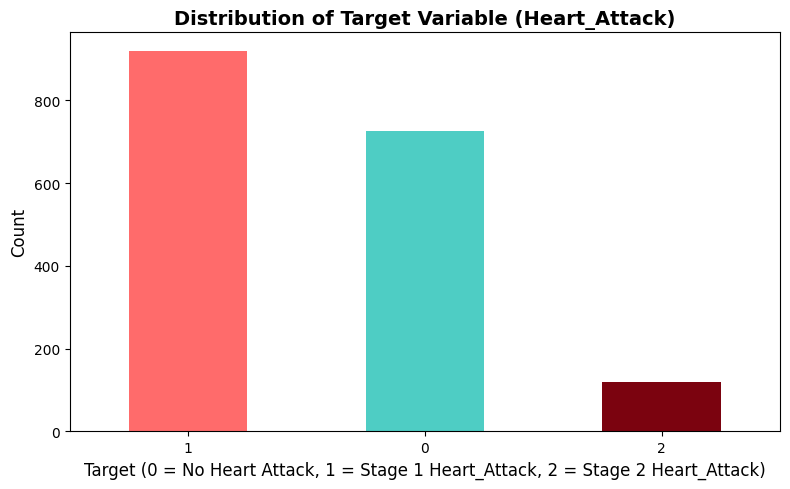

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['target'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', "#7B030F"])
plt.title('Distribution of Target Variable (Heart_Attack)', fontsize=14, fontweight='bold')
plt.xlabel('Target (0 = No Heart Attack, 1 = Stage 1 Heart_Attack, 2 = Stage 2 Heart_Attack)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlation Matrix

In [5]:
correlation_matrix = df.corr()
correlation_matrix['target'].sort_values(ascending=False)

target                 1.000000
Chest pain type        0.387791
ST slope               0.386339
exercise angina        0.367162
oldpeak                0.353318
sex                    0.221412
age                    0.216633
resting ecg            0.141792
fasting blood sugar    0.103726
trestbps               0.101450
cholesterol           -0.044904
max heart rate        -0.280506
Name: target, dtype: float64

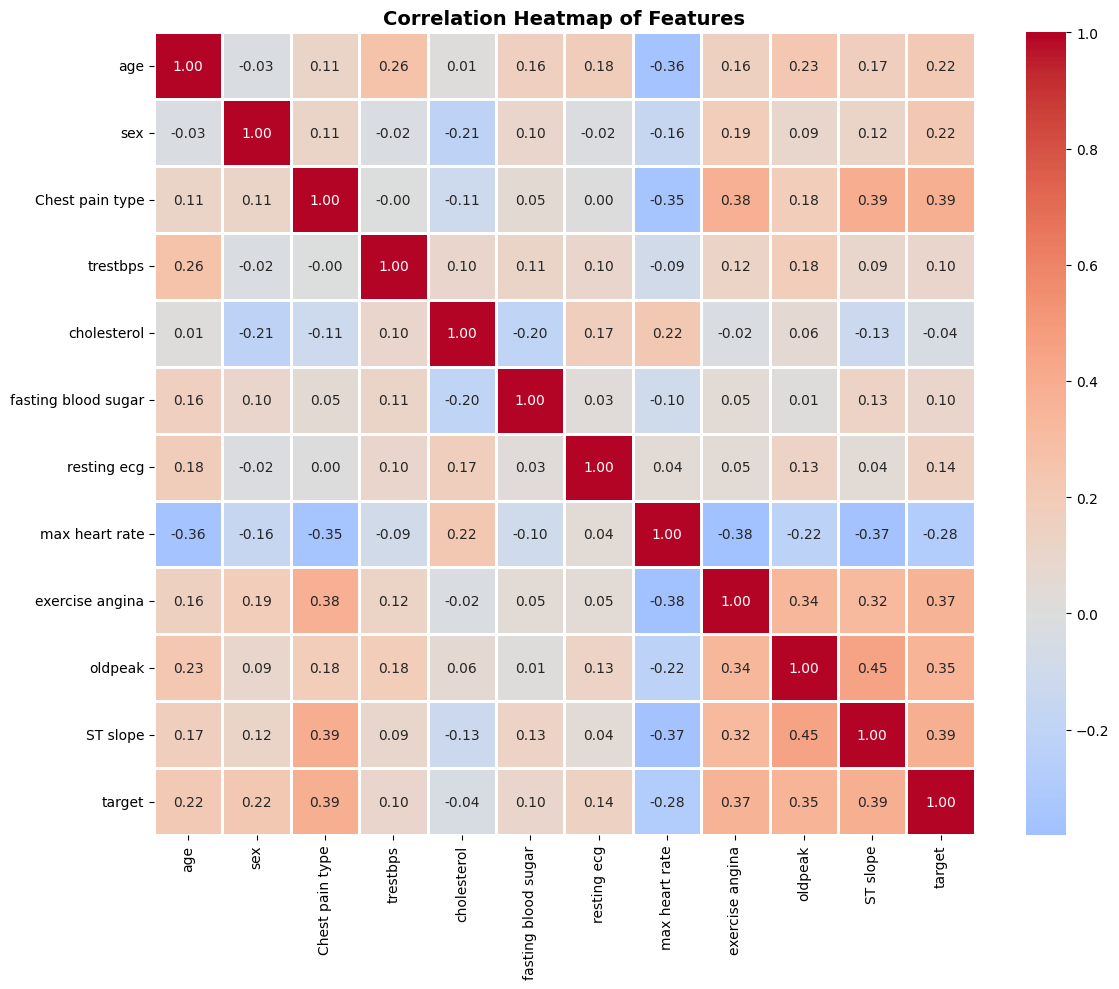

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Age and Chest Pain Visualization

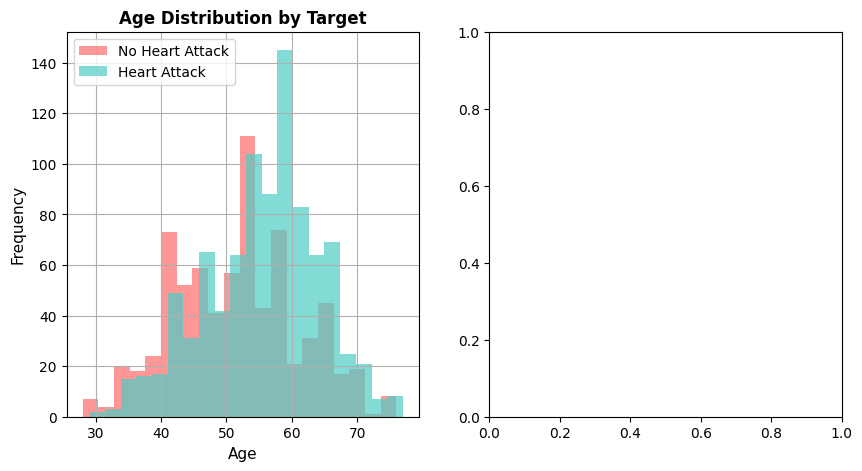

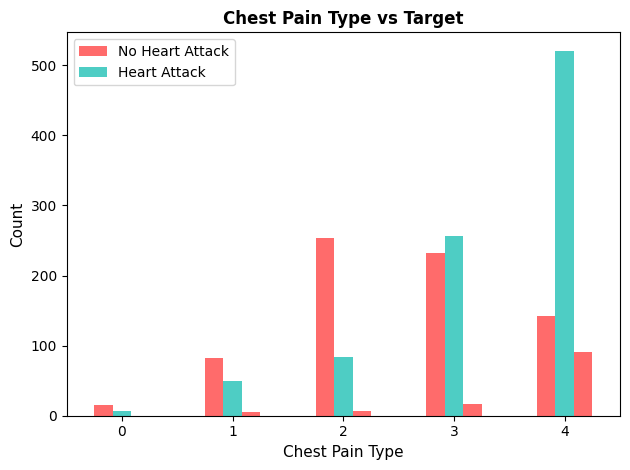

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[df['target'] == 0]['age'].hist(bins=20, alpha=0.7, label='No Heart Attack', color='#FF6B6B')
df[df['target'] == 1]['age'].hist(bins=20, alpha=0.7, label='Heart Attack', color='#4ECDC4')
plt.xlabel('Age', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Age Distribution by Target', fontsize=12, fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
pd.crosstab(df['Chest pain type'], df['target']).plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.xlabel('Chest Pain Type', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Chest Pain Type vs Target', fontsize=12, fontweight='bold')
plt.legend(['No Heart Attack', 'Heart Attack'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Preparation 

In [11]:
import numpy as np

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()

Number of duplicate rows: 272


Handle missing values

In [12]:
if df.isnull().sum().sum() > 0:
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)